# Introduction to scikit-learn (sklearn)

## 0. An end-to-end Scikit-learn workflow

In [1]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# Create X (features matrix)
X = heart_disease.drop("target", axis=1)

# Create y (labels)
y = heart_disease["target"]

In [3]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# Keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3. Fit the model to the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [5]:
clf.fit(X_train, y_train);

In [6]:
import numpy as np

In [7]:
# make prediction
y_label = clf.predict(np.array[0,2,3,4])

TypeError: 'builtin_function_or_method' object is not subscriptable

In [8]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [9]:
y_test

61     1
163    1
27     1
160    1
21     1
      ..
129    1
78     1
265    0
237    0
82     1
Name: target, Length: 61, dtype: int64

In [10]:
# 4. Evaluate the model on the training data and test data
clf.score(X_train, y_train)

1.0

In [11]:
clf.score(X_test, y_test)

0.9344262295081968

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        25
           1       0.90      1.00      0.95        36

    accuracy                           0.93        61
   macro avg       0.95      0.92      0.93        61
weighted avg       0.94      0.93      0.93        61



In [13]:
confusion_matrix(y_test, y_preds)

array([[21,  4],
       [ 0, 36]])

In [14]:
accuracy_score(y_test, y_preds)

0.9344262295081968

In [15]:
# 5. Improve a model
# try different amount of n_estimators

np.random.seed(42)
for i in range(10, 100, 10):
    print(f"trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"model accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print("")

trying model with 10 estimators..
model accuracy on test set: 83.61%

trying model with 20 estimators..
model accuracy on test set: 91.80%

trying model with 30 estimators..
model accuracy on test set: 86.89%

trying model with 40 estimators..
model accuracy on test set: 90.16%

trying model with 50 estimators..
model accuracy on test set: 95.08%

trying model with 60 estimators..
model accuracy on test set: 90.16%

trying model with 70 estimators..
model accuracy on test set: 90.16%

trying model with 80 estimators..
model accuracy on test set: 93.44%

trying model with 90 estimators..
model accuracy on test set: 90.16%



In [16]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))

In [17]:
loaded_model = pickle.load(open("random_forest_model_1.pk1","rb"))
loaded_model.score(X_test, y_test)

0.9016393442622951

In [18]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.8 (default, Apr 13 2021, 12:59:45)  [Clang 10.0.0 ]
executable: /Users/home/Desktop/project_1/env/bin/python
   machine: macOS-10.16-x86_64-i386-64bit

Python dependencies:
          pip: 21.0.1
   setuptools: 52.0.0.post20210125
      sklearn: 0.24.1
        numpy: 1.19.2
        scipy: 1.6.2
       Cython: None
       pandas: 1.2.4
   matplotlib: 3.3.4
       joblib: 1.0.1
threadpoolctl: 2.1.0

Built with OpenMP: True


In [19]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Getting our data ready to be used with machine learning

Thre main things we need to do:

    1. Split the data into features and labels (usually "X" & 'y')
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical to numertical values (also called feature encoding)

In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = heart_disease.drop("target", axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
# Split the data into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [25]:
X.shape

(303, 13)

# 1.1 Make sure it's all numerical

In [26]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [27]:
len(car_sales)

1000

In [28]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [29]:
# split into X and y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

#split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [30]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
car_sales.head()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
pd.DataFrame(transformed_X)

In [ ]:
# antoher way of converting to "0's" and "1's"
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

In [ ]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size = 0.2)


model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

### Dealing with missing data

1. Fill them with some value (also known as imputation).
2. Remove the samples with missing data altogether.

In [ ]:
# Import car sales missing data

car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
#  Create X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [ ]:
# Let's try  and convert out data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(X)
transformed_X

In [ ]:
car_sales_missing

### Option1: Fill missing data with pandas

In [ ]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing", inplace= True)

# Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace=True)

# Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the "Doors"
car_sales_missing["Doors"].fillna(4, inplace=True)

In [31]:
# check our data again
car_sales_missing.isna().sum()

NameError: name 'car_sales_missing' is not defined

In [ ]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [32]:
car_sales_missing.isna().sum()

NameError: name 'car_sales_missing' is not defined

In [33]:
len(car_sales_missing)

NameError: name 'car_sales_missing' is not defined

In [34]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

NameError: name 'car_sales_missing' is not defined

In [35]:
# Let's try  and convert out data to numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

NameError: name 'car_sales_missing' is not defined

### Option 2: Fill missing values with sklearn

In [36]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [37]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
# Drop the columns with missing values
car_sales_missing.dropna(subset=["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [39]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [40]:
# Fill missing values with Sci-kit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#  Fill categorical values with "missing" and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_feature = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]



# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_feature),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_feature)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [41]:
car_sales_filled = pd.DataFrame(filled_X,
                                columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [42]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [43]:
# Convert data into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                 one_hot,
                                categorical_features)],
                                remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [44]:
# Data as numbers and filled (no misisng values)
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(transformed_X, y,test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

In [45]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Choosing the right estimator/algorithm for our problems
Sci-kit learn uses estimator as another term for machine learning model or algorithm.

* Classification - predicting weather a sample is one thing or other(heart_disease)
* Regression - predicting a number(car_sales, boston_housing)

Step 1 - Check the Scikit-learn machine learning map..https://scikit-learn.org/stable/tutorial/machine_learning_map/

## 2.1 Picking a machine learning model for a regression problem

In [46]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [47]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [48]:
# How mant samples
len(boston_df)

506

In [49]:
# Let's try Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.6662221670168522

How do we improve our score?

What if Ridge wasn't working?

map - https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [50]:
# let's try RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create a data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Random Forest Regressor
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.8922527442109116

In [51]:
# Check the Ridge model again
model.score(X_test, y_test)

0.6662221670168522

### 2.2 Choosing an estimator for a classification problem

Let's go to the map..https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [52]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [53]:
len(heart_disease)

303

Consulting the map and it says to try `LinearSVC`

In [54]:
#  Import the linearSVC estimator class
from sklearn.svm import LinearSVC

#Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate LinearSVC 
clf = LinearSVC()
clf.fit(X_train, y_train)

# Evaluate the LinearSVC
clf.score(X_test, y_test)

/Users/home/Desktop/project_1/env/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [55]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [56]:
# Import the RandomForestCLassifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evalaute the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

Tibit: 
* If we have structed data, use `Ensemble Methods`
* If we have unstructed data, use `Deep Learning or Transfer learning`

## 3. Fit the model/ algorithm on our datat and use it to make prediction

### 3.1 Fitting the model to the data

* `X` = feature, feature variables, data
* `y` = labels, targets, target variables

In [57]:
# Import the RnadomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instatiate RandomForestClassifier
clf  = RandomForestClassifier()

# Fit the model to the data
clf.fit(X_train, y_train)

# evaluate the RandomForestClassifier
clf.score(X_test, y_test)

0.8524590163934426

In [58]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [59]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## 3.2 Make predictions using machine learning model

Two ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [60]:
# Use a trianed model to make predictions
clf.predict(np.array[1,2,3,4,5,]) # this doesn't work

TypeError: 'builtin_function_or_method' object is not subscriptable

In [ ]:
X_test.head()

In [ ]:
clf.predict(X_test)

In [ ]:
np.array(y_test)

In [ ]:
# compare predictions to truth lables to evalaute the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

Make predictions with `predict_proba()`

In [ ]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

In [ ]:
# Let's predict() on the same data...
clf.predict(X_test[:5])

`predict()`  can also be used for regression models.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create a data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instentiate and fit the model
model = RandomForestRegressor().fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [ ]:
y_preds[:10]

In [ ]:
np.array(y_test[:10])

In [61]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.5573770491803278

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-learn models/estimators:
1. Estimator `score` method
2. The `scoring` parqameter
3. Problem-specific matric fucntions


### 4.1 Evaluating a model with `score` method

In [62]:
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
clf.score(X_train, y_train)

1.0

In [64]:
clf.score(X_test, y_test)

0.8032786885245902

Let's do the same for regressor

In [65]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create a data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Instentiate and fit the model
model = RandomForestRegressor().fit(X_train, y_train)

In [66]:
model.score(X_test, y_test)

0.8654448653350507

### 4.2 Evaluating a model using the `scoring` parameter

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train);

In [68]:
clf.score(X_test, y_test)

0.7704918032786885

In [69]:
cross_val_score(clf, X, y)

array([0.80327869, 0.90163934, 0.81967213, 0.85      , 0.8       ])

In [70]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(X_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y))

# Compare the two
clf_single_score, clf_cross_val_score


(0.7704918032786885, 0.8248087431693989)

In [71]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,X, y)

In [73]:
np.mean(cross_val_score)

0.8381967213114754

In [74]:
print(f"Heart Disease Classifier Cross-validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-validated Accuracy: 83.82%


**Area under the receiver operating characteristic curve(AUC/ROC)**

* Area under curve(AUC)
* ROC curve

ROC curve are a comparision of a model's true postitive rate (tpr) versus a models false positive rate(fpr)

In [75]:
# Split the data for train and tets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [76]:
from sklearn.metrics import roc_curve

# fit the classifier
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.49, 0.51],
       [0.01, 0.99],
       [0.7 , 0.3 ],
       [0.75, 0.25],
       [0.2 , 0.8 ],
       [0.03, 0.97],
       [0.77, 0.23],
       [0.2 , 0.8 ],
       [0.18, 0.82],
       [0.47, 0.53]])

In [77]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.51, 0.99, 0.3 , 0.25, 0.8 , 0.97, 0.23, 0.8 , 0.82, 0.53])

In [78]:
# Calcualte fpr, tpr and thresholds
fpr, tpr, thrsholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.03571429, 0.07142857,
       0.07142857, 0.07142857, 0.07142857, 0.07142857, 0.10714286,
       0.10714286, 0.25      , 0.25      , 0.28571429, 0.28571429,
       0.57142857, 0.60714286, 0.71428571, 0.78571429, 0.82142857,
       0.92857143, 1.        ])

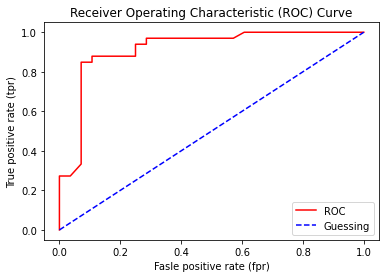

In [79]:
# Crete a function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive ratre (fpr)
    and true positive rate (tpr) of a model.
    """
    # plot roc curve
    plt.plot(fpr, tpr, color="red", label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0,1], [0,1], color = "blue", linestyle="--", label = "Guessing")
    
    # Customize the plot
    plt.xlabel("Fasle positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)


In [80]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.91504329004329

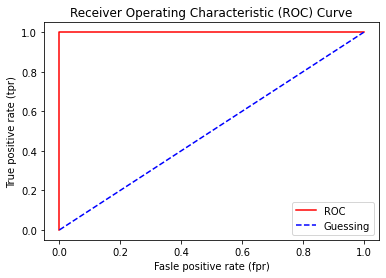

In [81]:
# PLot perfect ROC curve and AUC score
fpr, tpr, thrsholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [82]:
# perfect AUC curve score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused.

In [83]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[25,  3],
       [ 4, 29]])

In [85]:
# Visual confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,25,3
1,4,29


In [86]:
25+3+4+29

61

In [87]:
len(X_test)

61

In [92]:
#  How to install a conda package into the current environment from a Jupyter Notebook
#  import sys
# !conda install --yes --prefix {sys.seaborn} seaborn

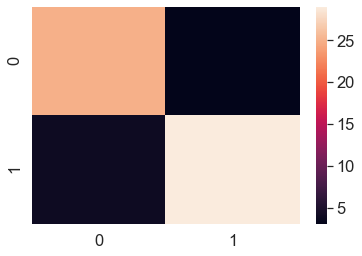

In [89]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Creat a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

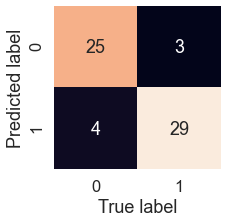

In [94]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes with conf_mat info
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label");
    
plot_conf_mat(conf_mat)

**Classification Report**

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.91      0.88      0.89        33

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



In [98]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one postitve case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds,
                                   output_dict=True))

/Users/home/Desktop/project_1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/home/Desktop/project_1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/home/Desktop/project_1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summerize classification metrics:

* **Accuracy** is  a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
* **Precision** and **recall** become more important when classes are imbalanced.
* If False positive are worse than False negatives, aim for higher precision.
* If False negative predictions are worse than False positive, aim for higer recall.
* **F1-score** is a combination of precision and recall.

### 4.2.2 Regression model evaluation metrics

Model evluation metrics documentation - Model evluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (pronounced as r-squared) or Co-efficient of determination.
2. Mean Absolute Error (MAE)
3. Mean Squared Error (MSE)

**R^2**

What R-squared does: Compared your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [162]:
from sklearn.ensemble import RandomForestRegressor

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [101]:
model.score(X_test, y_test)

0.7715979172281009

In [102]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [103]:
y_test.mean()

22.65196078431373

In [104]:
r2_score(y_test, y_test_mean)

0.0

In [106]:
r2_score(y_test, y_test)

1.0

**Mean Absolute Error (MAR)**

MAE is the average of the aboslute difference between predictions and actual values. It gives you an idea of how wrong your models are.

In [107]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.8669999999999995

In [109]:
df = pd.DataFrame(data = {"actual values": y_test,
                          "predicted values": y_preds})

df["diffrences"] = df["actual values"] - df["predicted values"]

In [110]:
df

,actual values,predicted values,diffrences
307,28.2,28.647,-0.447
271,25.2,24.672,0.528
57,31.6,31.939,-0.339
449,13.0,14.591,-1.591
430,14.5,14.136,0.364
...,...,...,...
77,20.8,22.072,-1.272
459,20.0,17.814,2.186
284,32.2,31.481,0.719
262,48.8,45.688,3.112


**Mean Squared Error (MSE)** 

In [163]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

7.079909686274509

In [118]:
df["diffrences"]

307   -0.447
271    0.528
57    -0.339
449   -1.591
430    0.364
       ...  
77    -1.272
459    2.186
284    0.719
262    3.112
406   -1.174
Name: diffrences, Length: 102, dtype: float64

In [120]:
squared = np.square(df["diffrences"])
squared.mean()

23.445819999999994

### 4.2.3 Finally using the `scoring` parameter

In [127]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [128]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [129]:
# Cross-validation accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [132]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, scoring="accuracy")
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [135]:
# Precision
cv_precision = cross_val_score(clf, X, y, scoring ="precision")
np.mean(cv_precision)

0.8357542034012623

In [138]:
# Recall
cv_recall = cross_val_score(clf, X, y, scoring="recall")
np.mean(cv_recall)

0.8606060606060606

In [140]:
# F1 
cv_f1 = cross_val_score(clf, X, y, scoring="f1")
np.mean(cv_f1)

0.8259518966438746

How about regression model?

In [142]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

model = RandomForestRegressor()

In [146]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, scoring=None)
np.mean(cv_r2)

0.6243870737930857

In [145]:
np.random.seed(42)
cv_r2 = cross_val_score(model ,X, y, scoring="r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [148]:
# mean absolute error

cv_mae = cross_val_score(model, X, y, scoring="neg_mean_absolute_error")
cv_mae

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

In [153]:
# mean square error
cv_mse = cross_val_score(model, X, y, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.729149843894373

### 4.3 Using different evaluation metrics as Scikit-Learn function

**Classification Evaluation Functions**

In [166]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the Classifier
print(f'Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1: {f1_score(y_test, y_preds)}')

Classifier metrics on the test set
Accuracy: 81.97%
Precision: 0.8055555555555556
Recall: 0.8787878787878788
F1: 0.8405797101449276


**Regression Evaluation Functions**

In [170]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions using regression model
y_preds = model.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression model metrics on the test set
R^2: 0.8961276223480188
MAE: 2.101911764705885
MSE: 7.878278656862749


## 5. Improving a model

First predictions = baseline predictions & First model = baseline model.

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyperparameters vs. Parameters:
* Parameters = model finds these pattern in data.
* Hyperparameters = settings on models you could adjust to (potentially) improve its ability to find patterns.

Three ways to adjust hyperparameters:

1. By hand
2. Randomly with RandomSearchCV
3. Randomly with GridSearchCV

In [171]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [172]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand

Let's make 3 sets: training, validation and test.

We are going to try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `mis_samples_split`
* `n_estimators`

In [173]:
def evaluate_preds(y_true, y_preds):
    """
    Performs an evaluation comparison on y_true labels vs. y_preds labels on Cassification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2),
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    
    return metric_dict

In [183]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data into train, validation & test
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split] 
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 71.11%
Precision: 0.00
Recall: 0.00
F1: 0.00


/Users/home/Desktop/project_1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.71, 'precision': 0.0, 'recall': 0.0, 'f1': 0.0}

In [184]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evalaute the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 68.89%
Precision: 0.00
Recall: 0.00
F1: 0.00


/Users/home/Desktop/project_1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [192]:
np.random.seed(42)
clf_3 = RandomForestClassifier(n_estimators=100,
                               max_depth=10)
clf_3.fit(X_train, y_train)
y_preds_3 = clf_3.predict(X_valid)
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Acc: 68.89%
Precision: 0.00
Recall: 0.00
F1: 0.00


/Users/home/Desktop/project_1/env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 5.2 Hyperparameter tuning with RandomizedSearchCV

In [295]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   8.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   9.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   7.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   7.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   6.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [231]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [233]:
# Make predictions with hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [236]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [277]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Split into X & y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split inot train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate the RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5,
                      verbose=2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   1.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   1.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [240]:
# Make Predictions with hyperparameters
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 83.61%
Precision: 0.85
Recall: 0.85
F1: 0.85


Let's compare different models metrics.

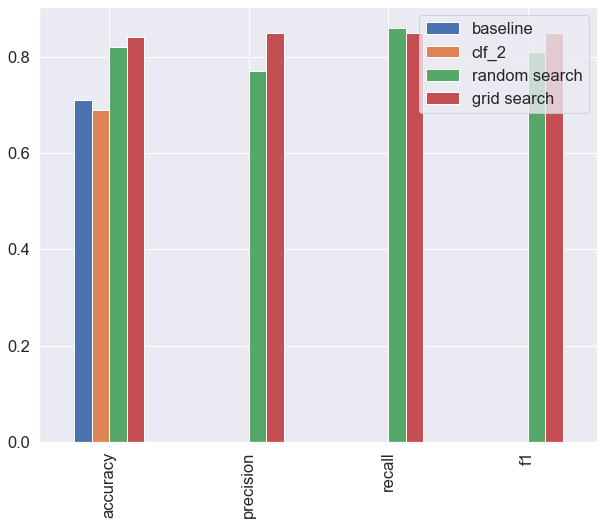

In [247]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

In [248]:
compare_metrics

,baseline,clf_2,random search,grid search
accuracy,0.71,0.69,0.82,0.84
precision,0.00,0.00,0.77,0.85
recall,0.00,0.00,0.86,0.85
f1,0.00,0.00,0.81,0.85


## 6. Saving and loading trained machine learning models

Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. with the `joblib` module

**Pickle**

In [251]:
import pickle

#  Save an extisting model to file
pickle.dump(gs_clf, open("grid_search_model_1.pkl", "wb"))

In [252]:
# Load a saved model
gs_model = pickle.load(open("grid_search_model_1.pkl", "rb"))

In [253]:
# Make some predictions 
pickle_y_preds = gs_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 83.61%
Precision: 0.85
Recall: 0.85
F1: 0.85


{'accuracy': 0.84, 'precision': 0.85, 'recall': 0.85, 'f1': 0.85}

**Joblib**

In [254]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_model.joblib")

['gs_random_model.joblib']

In [255]:
# Import a saved joblib model
joblib_model = load(filename="gs_random_model.joblib")

In [256]:
# Make predictions and evalaute
joblib_y_preds = joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 83.61%
Precision: 0.85
Recall: 0.85
F1: 0.85


{'accuracy': 0.84, 'precision': 0.85, 'recall': 0.85, 'f1': 0.85}

## 7. Putting it all together!

In [259]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [260]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [261]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):

1. Fill missing data
2. Convert data into numebers
3. Build a model on the data

In [297]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# Modelling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and tranformer pipeline
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_tranformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_feature = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))])

# Setup preprocessing steps(fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers=[
                        ("cat", categorical_transformer, categorical_features),
                        ("door", door_tranformer, door_feature),
                        ("num", numeric_transformer, num_feature)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Slpit the data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit ans score thre model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [302]:
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features":["auto"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   1.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.9s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.7s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.7s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.7s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   5.7s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   5.9s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [303]:
gs_model.score(X_test, y_test)

0.33278687076664937